In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

data = pd.read_csv('suvPrediction.csv', delimiter = ',')
print(data.shape)
data.head(10)

(400, 5)


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0

In [2]:
print("Number of employee in original data:" +str(len(data.index)))

Number of employee in original data:400


# Analyzing Data

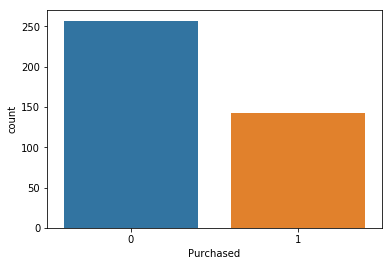

In [7]:
sns.countplot(x = 'Purchased', data = data)

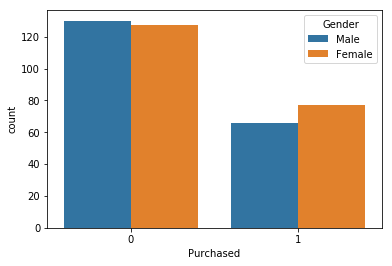

In [10]:
sns.countplot(x = 'Purchased', hue = 'Gender', data = data)

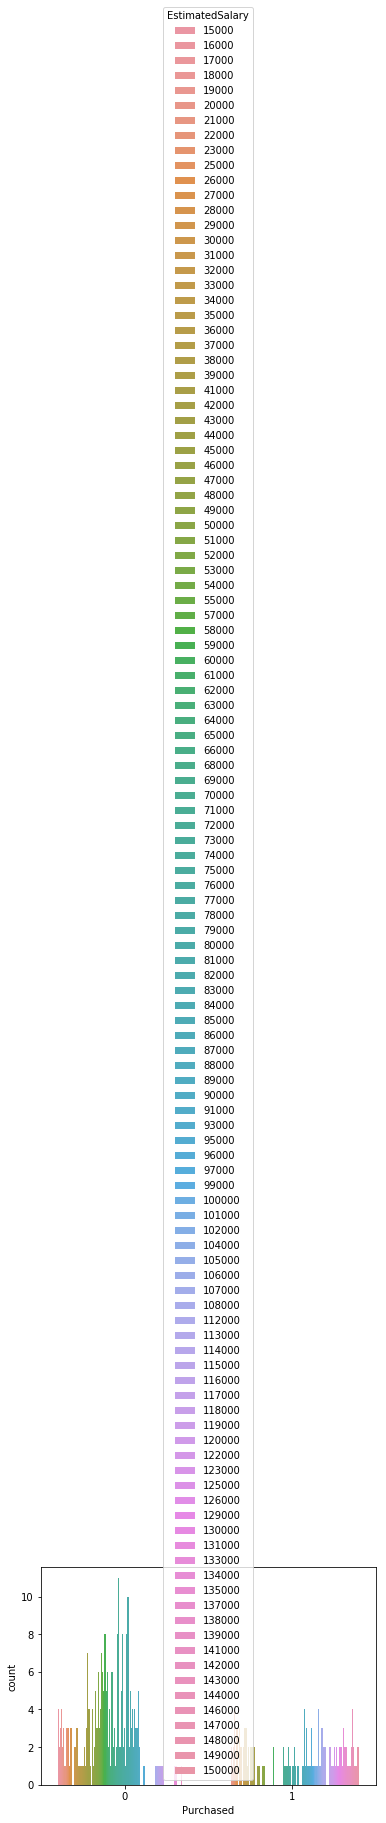

In [13]:
sns.countplot(x = 'Purchased', hue = 'EstimatedSalary', data = data)

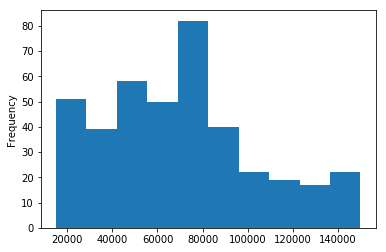

In [14]:
data["EstimatedSalary"].plot.hist()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [16]:
data.isnull()

User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      False   False  False            False      False
4      False   False  False            False      False
5      False   False  False            False      False
6      False   False  False            False      False
7      False   False  False            False      False
8      False   False  False            False      False
9      False   False  False            False      False
10     False   False  False            False      False
11     False   False  False            False      False
12     False   False  False            False      False
13     False   False  False            False      False
14     False   False  False            False      False
15     False   False  False            False      False
16     False   False  False            False      False
17     False   False  False            False      False
18     False   False  False            False      False
19     False   False  False            False      False
20     False   False  False            False      False
21     False   False  False            False      False
22     False   False  False            False      False
23     False   False  False            False      False
24     False   False  False            False      False
25     False   False  False            False      False
26     False   False  False            False      False
27     False   False  False            False      False
28     False   False  False            False      False
29     False   False  False            False      False
..       ...     ...    ...              ...        ...
370    False   False  False            False      False
371    False   False  False            False      False
372    False   False  False            False      False
373    False   False  False            False      False
374    False   False  False            False      False
375    False   False  False            False      False
376    False   False  False            False      False
377    False   False  False            False      False
378    False   False  False            False      False
379    False   False  False            False      False
380    False   False  False            False      False
381    False   False  False            False      False
382    False   False  False            False      False
383    False   False  False            False      False
384    False   False  False            False      False
385    False   False  False            False      False
386    False   False  False            False      False
387    False   False  False            False      False
388    False   False  False            False      False
389    False   False  False            False      False
390    False   False  False            False      False
391    False   False  False            False      False
392    False   False  False            False      False
393    False   False  False            False      False
394    False   False  False            False      False
395    False   False  False            False      False
396    False   False  False            False      False
397    False   False  False            False      False
398    False   False  False            False      False
399    False   False  False            False      False

[400 rows x 5 columns]

In [17]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Train Data

In [18]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()

In [27]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92        68\n           1       0.89      0.75      0.81        32\n\n   micro avg       0.89      0.89      0.89       100\n   macro avg       0.89      0.85      0.87       100\nweighted avg       0.89      0.89      0.89       100\n'

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,predictions)

array([[65,  3],
       [ 8, 24]])

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,predictions)*100

89.0